### Understanding the data
Digging into the file to understand its structure and contents

Representative Example from the Dataset:
key                  2009-06-15 17:26:21.0000001
fare_amount                                  4.5
pickup_datetime          2009-06-15 17:26:21 UTC
pickup_longitude                      -73.844311
pickup_latitude                        40.721319
dropoff_longitude                      -73.84161
dropoff_latitude                       40.712278
passenger_count                              1.0
Name: 0, dtype: object

Dataset Characteristics:
Total number of items: 15325335
Data types of each column:
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

Data Quality Assessment:
Number of missing values in each column:
key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       1
pickup_latitude        1
dropoff_longitude    

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

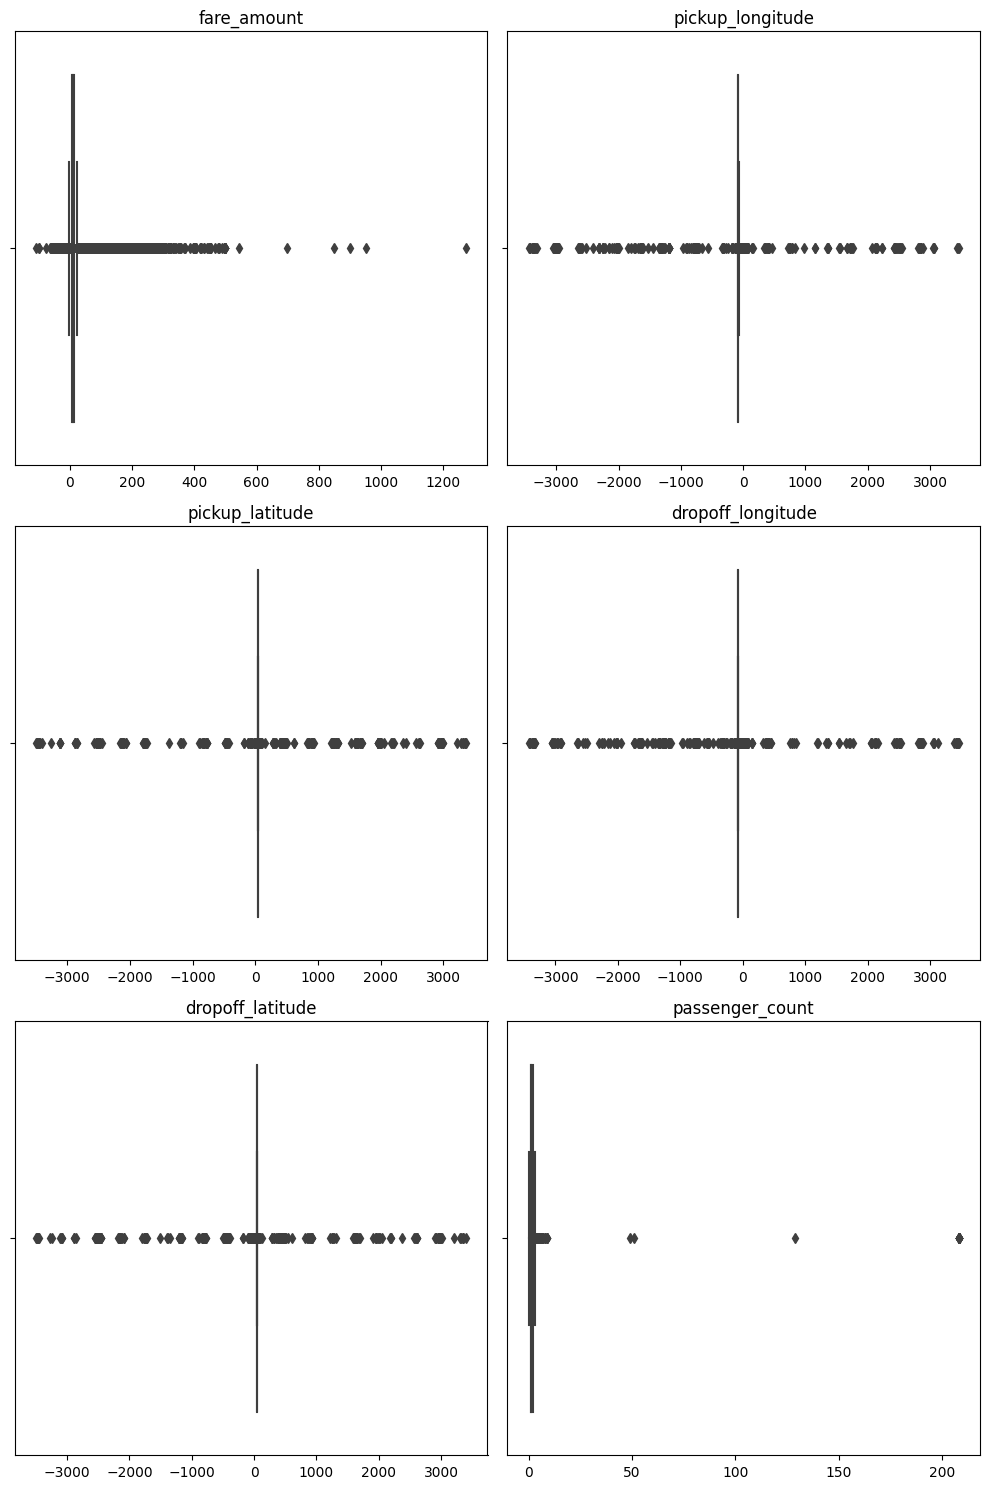

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


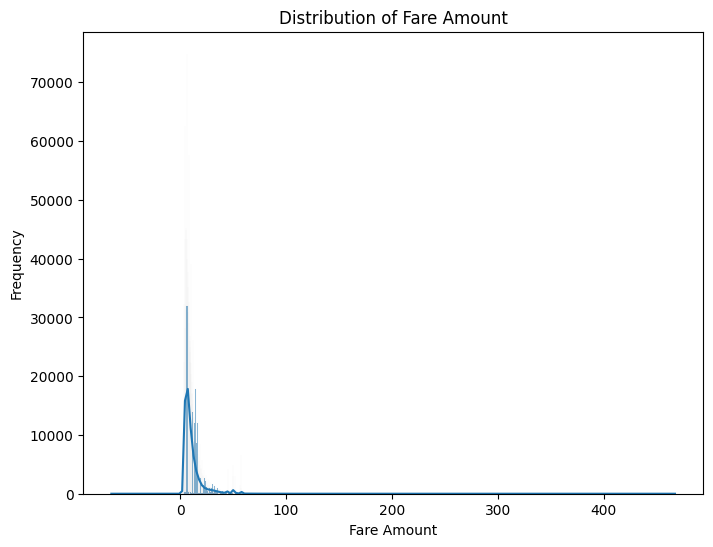

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

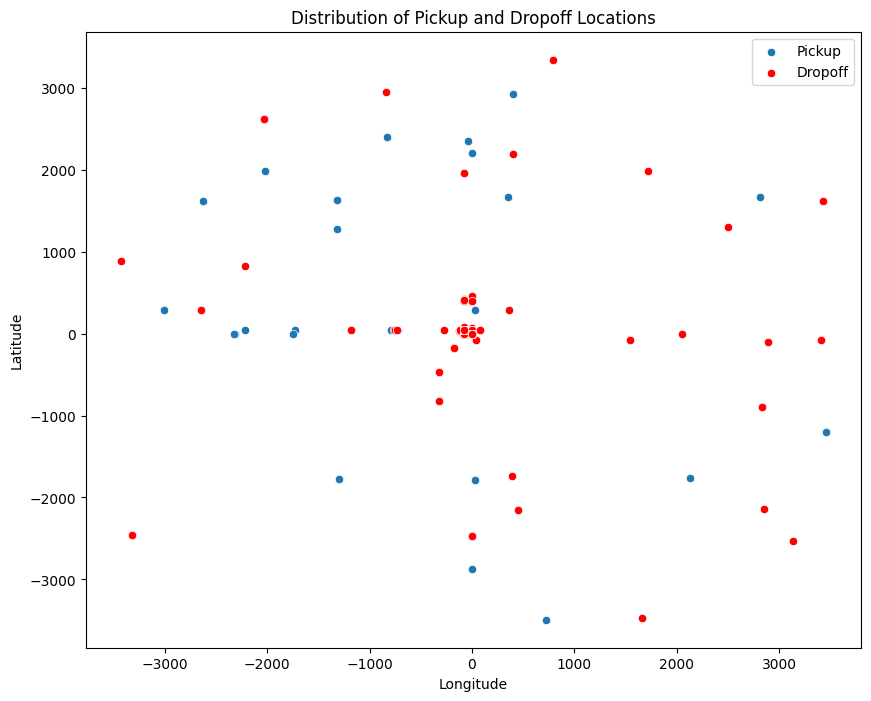

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


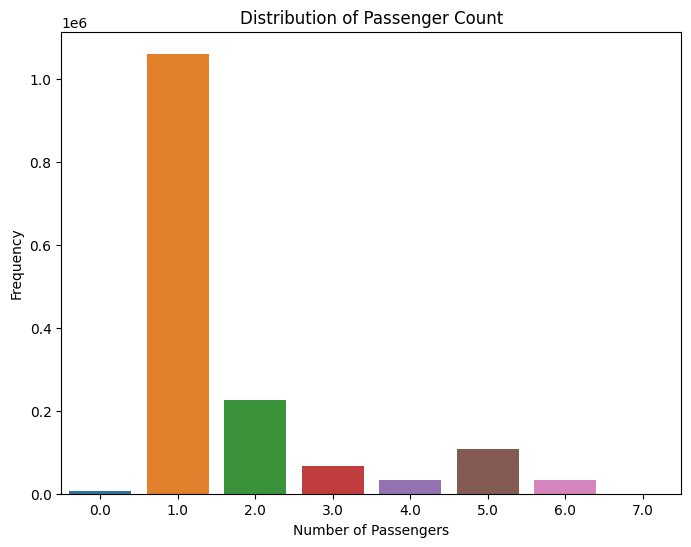

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize(df):
    # Basic Data Characteristics
    print("Representative Example from the Dataset:")
    print(df.iloc[0])
    
    print("\nDataset Characteristics:")
    print(f"Total number of items: {len(df)}")
    print("Data types of each column:")
    print(df.dtypes)

    # Data Quality Assessment
    print("\nData Quality Assessment:")
    print("Number of missing values in each column:")
    print(df.isnull().sum())

    # Create and Display Box Plots for Each Numeric Column
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numeric_columns)
    num_rows = num_plots // 2 + num_plots % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')

    if num_plots % 2 != 0:
        axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

    # Sample 10% of the Data for Further Visualization
    data_sample = df.sample(frac=0.1)

    # Distribution of Fare Amount
    plt.figure(figsize=(8, 6))
    sns.histplot(data_sample['fare_amount'], kde=True)
    plt.title('Distribution of Fare Amount')
    plt.xlabel('Fare Amount')
    plt.ylabel('Frequency')
    plt.show()

    # Distribution of Pickup and Dropoff Locations
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=data_sample, x='pickup_longitude', y='pickup_latitude', label='Pickup')
    sns.scatterplot(data=data_sample, x='dropoff_longitude', y='dropoff_latitude', color='r', label='Dropoff')
    plt.title('Distribution of Pickup and Dropoff Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

    # Distribution of Passenger Count
    data_sample.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data_sample['passenger_count'])
    plt.title('Distribution of Passenger Count')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Frequency')
    plt.show()

# Load the dataset in chunks
chunk_size = 50000
chunks = pd.read_csv("train.csv", chunksize=chunk_size)

# Concatenate chunks into a single dataframe
data = pd.concat([chunk for chunk in chunks], axis=0)

# Call the analysis and visualization function
analyze_and_visualize(data)


### Data cleaning and preprocessing functions
Computing Haversine distance
Removing:
    - unreasonable -ve values
    - too long distances
    -  0 < no passengers of > 6 

Doing feature engineering for:
    - time of day
    - day of week
    - month of year
    - year
    - distance
    - speed
    - direction

Raw data columns: Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
Distance calculated...
Time features created...


C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_25316\1693481150.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'pickup_cluster'] = cluster_locations(df['pickup_latitude'], df['pickup_longitude'])
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_25316\1693481150.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'dropoff_cluster'] = cluster_locations(df['dropoff_latitude'], df['dropoff_longitude'])


Location clusters created...


C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_25316\1693481150.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"pickup_distance_to_{landmark}"] = pickup_distance
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_25316\1693481150.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"dropoff_distance_to_{landmark}"] = dropoff_distance
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_25316\1693481150.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Distances to landmarks calculated...
Interaction features and binning created...
Feature engineered data columns: Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'year', 'month', 'day', 'hour',
       'day_of_week', 'is_weekend', 'is_peak_hour', 'pickup_cluster',
       'dropoff_cluster', 'pickup_distance_to_JFK_Airport',
       'dropoff_distance_to_JFK_Airport',
       'pickup_distance_to_LaGuardia_Airport',
       'dropoff_distance_to_LaGuardia_Airport',
       'pickup_distance_to_Central_Park', 'dropoff_distance_to_Central_Park',
       'pickup_distance_to_Times_Square', 'dropoff_distance_to_Times_Square',
       'pickup_lat_lon_interaction', 'dropoff_lat_lon_interaction',
       'part_of_day'],
      dtype='object')
Representative Example from the Dataset:
key                                      2009-06-15 17:26:21.0000001
fare_amount                     

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

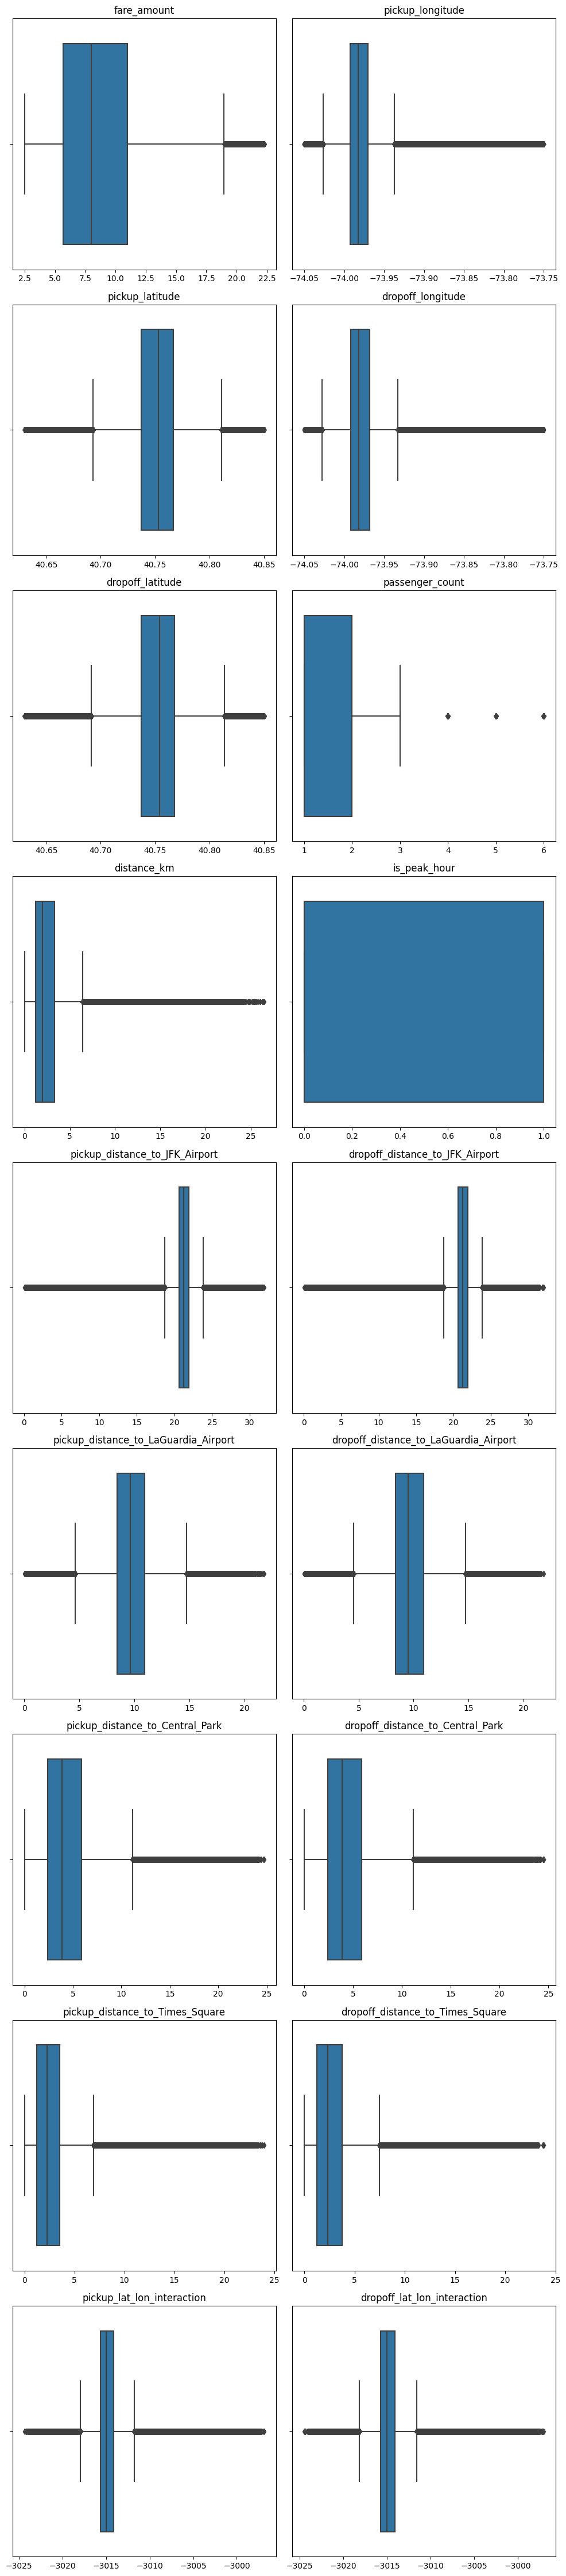

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


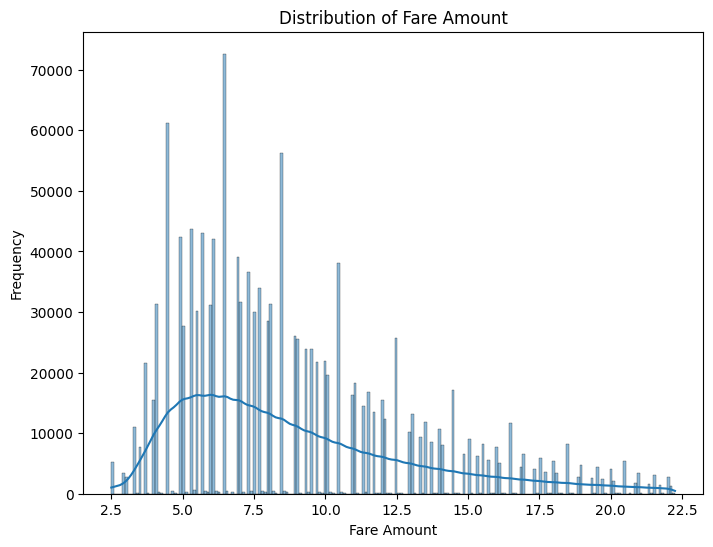

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

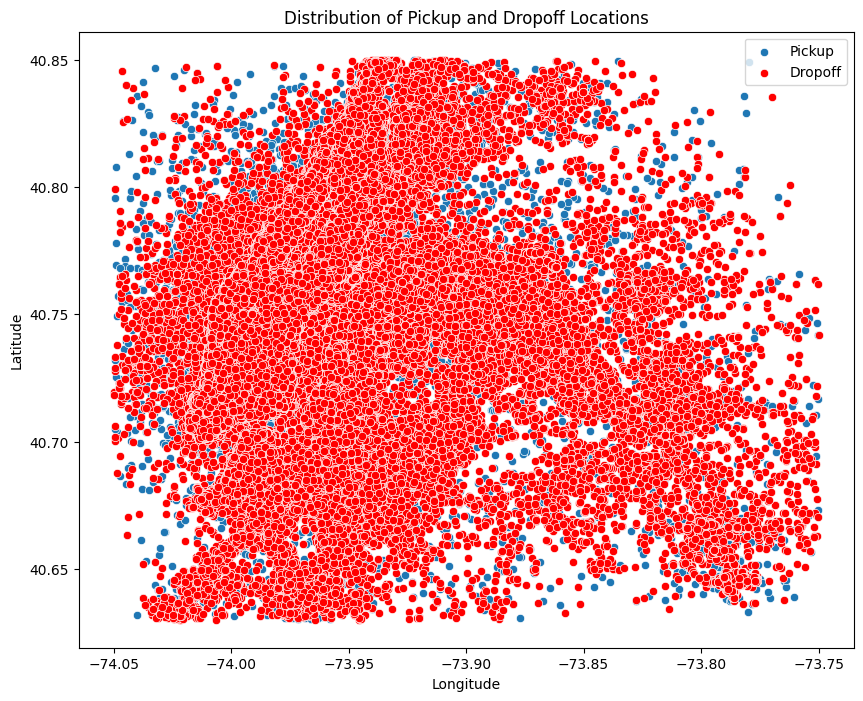

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


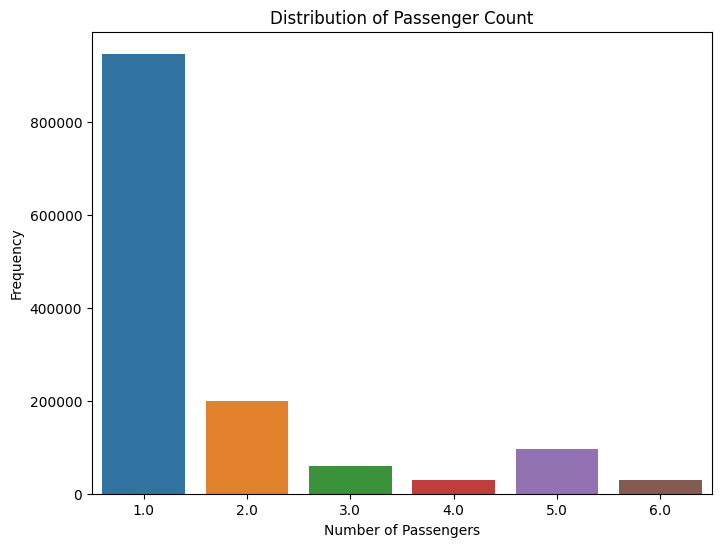

Raw test data columns: Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
Distance calculated...
Time features created...
Location clusters created...
Distances to landmarks calculated...
Distances to landmarks calculated...
Interaction features and binning created...
Feature engineered test data columns: Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km', 'year', 'month', 'day', 'hour', 'day_of_week',
       'is_weekend', 'is_peak_hour', 'pickup_cluster', 'dropoff_cluster',
       'pickup_distance_to_JFK_Airport', 'dropoff_distance_to_JFK_Airport',
       'pickup_distance_to_LaGuardia_Airport',
       'dropoff_distance_to_LaGuardia_Airport',
       'pickup_distance_to_Central_Park', 'dropoff_distance_to_Central_Park',
       'pickup_distance_to_Times_Square', 'dropoff_

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Function to calculate haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Function to calculate cluster labels for pickup locations by applying the KMeans algorithm
def cluster_locations(latitudes, longitudes, n_clusters=10):
    """Cluster latitudes and longitudes using KMeans."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(np.vstack((latitudes, longitudes)).T)
    return clusters

# Dictionary of major landmarks in Manhattan
LANDMARKS = {
    "JFK_Airport": (40.6413, -73.7781),
    "LaGuardia_Airport": (40.7769, -73.8740),
    "Central_Park": (40.7851, -73.9683),
    "Times_Square": (40.7580, -73.9855),
}

# Function to calculate distances to major landmarks by applying the haversine function
def calculate_distances_to_landmarks(df):
    """Calculate distances from pickup and dropoff coordinates to major landmarks."""
    for landmark, (lat, lon) in LANDMARKS.items():
        pickup_distance = haversine_distance(
            df['pickup_latitude'], df['pickup_longitude'], lat, lon
        )
        dropoff_distance = haversine_distance(
            df['dropoff_latitude'], df['dropoff_longitude'], lat, lon
        )
        df.loc[:, f"pickup_distance_to_{landmark}"] = pickup_distance
        df.loc[:, f"dropoff_distance_to_{landmark}"] = dropoff_distance
    print('Distances to landmarks calculated...')
    return df

# Function to implement time feature engineering by creating new columns for year, month, day, hour, day of week, and whether the day is a weekend
def preprocess_features(df):
    # Distance
    df['distance_km'] = haversine_distance(
        df['pickup_latitude'], 
        df['pickup_longitude'], 
        df['dropoff_latitude'], 
        df['dropoff_longitude']
    )
    print('Distance calculated...')
    
    # Time features
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)
    print('Time features created...')
    
    
    # Clustering pickup and dropoff locations. Note that kmeans doesn't work with NaNs
    df = df.dropna()
    df.loc[:, 'pickup_cluster'] = cluster_locations(df['pickup_latitude'], df['pickup_longitude'])
    df.loc[:, 'dropoff_cluster'] = cluster_locations(df['dropoff_latitude'], df['dropoff_longitude'])

    print('Location clusters created...')
    
    # Calculate distances to major landmarks
    df = calculate_distances_to_landmarks(df)
    
    return df

# Function to clean the data by removing unrealistic values
def clean_data(df):
    # Remove unrealistic coordinates by refining the bounding box around NYC
    bounding_box = {
        'min_long': -74.05,
        'min_lat': 40.63,
        'max_long': -73.75,
        'max_lat': 40.85
    }
    df = df[
        (df['pickup_longitude'] >= bounding_box['min_long']) & 
        (df['pickup_longitude'] <= bounding_box['max_long']) &
        (df['pickup_latitude'] >= bounding_box['min_lat']) & 
        (df['pickup_latitude'] <= bounding_box['max_lat']) &
        (df['dropoff_longitude'] >= bounding_box['min_long']) & 
        (df['dropoff_longitude'] <= bounding_box['max_long']) &
        (df['dropoff_latitude'] >= bounding_box['min_lat']) & 
        (df['dropoff_latitude'] <= bounding_box['max_lat'])
    ]

    # Remove entries where fare amount is less than $2.5 (minimum fare) and greater than $100
    df = df[(df['fare_amount'] >= 2.5) & (df['fare_amount'] <= 100)]
    
    # Remove entries where the distance is too long to be realistic for a taxi trip in NYC
    df = df[df['distance_km'] <= 100]

    # Remove data points where passenger count is outside the range 1 to 6
    df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

    # Remove data points that are outside the 1.5 * IQR range for fare_amount
    Q1_fare = df['fare_amount'].quantile(0.25)
    Q3_fare = df['fare_amount'].quantile(0.75)
    IQR_fare = Q3_fare - Q1_fare
    df = df[~((df['fare_amount'] < (Q1_fare - 1.5 * IQR_fare)) | (df['fare_amount'] > (Q3_fare + 1.5 * IQR_fare)))]

    # Remove null values
    df = df.dropna()
    
    return df

# Function to preprocess test data without removing outliers
def preprocess_test_data(df):
    # Apply haversine distance and clustering functions
    df = preprocess_features(df)
    df = df.dropna()
    df.loc[:, 'pickup_cluster'] = cluster_locations(df['pickup_latitude'], df['pickup_longitude'])
    df.loc[:, 'dropoff_cluster'] = cluster_locations(df['dropoff_latitude'], df['dropoff_longitude'])
    
    # Calculate distances to major landmarks
    df = calculate_distances_to_landmarks(df)
    df = add_feature_interactions_and_binning(df)
    
    return df

# Function to add interaction features and binning
def add_feature_interactions_and_binning(df):
    # Interaction Features
    df['pickup_lat_lon_interaction'] = df['pickup_latitude'] * df['pickup_longitude']
    df['dropoff_lat_lon_interaction'] = df['dropoff_latitude'] * df['dropoff_longitude']

    # Binning hours into different parts of the day
    bins = [0, 6, 12, 18, 24]
    labels = [0, 1, 2, 3]  # 0: night, 1: morning, 2: afternoon, 3: evening
    df['part_of_day'] = pd.cut(df['hour'], bins=bins, labels=labels, include_lowest=True).astype(int)
    
    # drop nan values
    df = df.dropna()
    
    print('Interaction features and binning created...')
    
    return df

    
# Now, we use the functions defined above to clean and preprocess  
# both the raw and processed training and test data

# FOR TRAINING DATA
# save the raw data and print columns
data_raw = data.copy()
data_raw.to_csv('train_raw.csv', index=False)
print("Raw data columns:", data_raw.columns)

# Preprocess features for feature engineered data
data_fe = preprocess_features(data)
data_fe = clean_data(data_fe)
data_fe = add_feature_interactions_and_binning(data_fe)

# Save the feature engineered data
data_fe.to_csv('train_fe.csv', index=False)
print("Feature engineered data columns:", data_fe.columns)
# visualize the data
analyze_and_visualize(data_fe)


# FOR TEST DATA
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Save the raw test data and print columns
test_data_raw = test_data.copy()
test_data_raw.to_csv('test_raw.csv', index=False)
print("Raw test data columns:", test_data_raw.columns)

# Preprocess features for feature engineered test data
test_data_fe = preprocess_test_data(test_data)

# Save the feature engineered test data
test_data_fe.to_csv('test_fe.csv', index=False)
print("Feature engineered test data columns:", test_data_fe.columns)



# Encoding categorical features and preparing data for both XGBoost and ANN
- One-hot encoding for categorical features to convert them into a format that can be provided to both XGBoost and ANN models.
 - Standard scaling for continuous features to normalize their distribution, mainly for optimal ANN performance, though it won't negatively impact XGBoost.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the feature-engineered training data
train_fe_df = pd.read_csv('train_fe.csv')

# Print columns of the feature-engineered data
print("Initial feature-engineered data columns:", train_fe_df.columns.tolist())

# Define continuous and categorical features
continuous_features = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'distance_km', 'pickup_distance_to_JFK_Airport', 'pickup_distance_to_LaGuardia_Airport',
    'pickup_distance_to_Central_Park', 'pickup_distance_to_Times_Square',
    'dropoff_distance_to_JFK_Airport', 'dropoff_distance_to_LaGuardia_Airport',
    'dropoff_distance_to_Central_Park', 'dropoff_distance_to_Times_Square'
]
categorical_features = [
    'year', 'month', 'day', 'hour', 'day_of_week',
    'is_weekend', 'is_peak_hour', 'part_of_day',
    'pickup_cluster', 'dropoff_cluster'
]

# Check that the features specified are present in the DataFrame
assert all(feature in train_fe_df.columns for feature in continuous_features + categorical_features), \
    "Some features are not in the DataFrame columns."

# Create the preprocessing pipelines for both numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine the numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor to the training data and transform the data
X_train_fe = preprocessor.fit_transform(train_fe_df.drop('fare_amount', axis=1))

# Debugging step to check the shape after transformation
print("Transformed feature shape:", X_train_fe.shape)

# Get the feature names for the transformed data
encoded_feature_names = preprocessor.get_feature_names_out()

# Debugging step to ensure the feature names and transformed shape match
print("Number of encoded feature names:", len(encoded_feature_names))
assert X_train_fe.shape[1] == len(encoded_feature_names), \
    "Mismatch in the number of transformed features and encoded feature names."

# Convert the transformed features back to a DataFrame
X_train_fe_df = pd.DataFrame(X_train_fe.toarray(), columns=encoded_feature_names)  # .toarray() converts sparse matrix to dense

# Debugging step to check if the DataFrame conversion added any unexpected columns
print("Columns after DataFrame conversion:", X_train_fe_df.columns.tolist())
assert len(X_train_fe_df.columns) == len(encoded_feature_names), \
    "Mismatch in DataFrame columns after conversion."

# Add the target column back to the DataFrame
X_train_fe_df['fare_amount'] = train_fe_df['fare_amount'].copy()

# Debugging step to check the final DataFrame shape
print("Final DataFrame shape:", X_train_fe_df.shape)

# Save the encoded DataFrame to CSV
X_train_fe_df.to_csv('train_fe_encoded.csv', index=False)

# Final debugging step to confirm the save was successful
print("Encoded training data saved to 'train_fe_encoded.csv'")


ValueError: Shape of passed values is (13608293, 1), indices imply (13608293, 94)

# Begin by training with linear regression

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the encoded and raw datasets
train_fe_encoded_df = pd.read_csv('train_fe_encoded.csv')
train_raw_df = pd.read_csv('train_raw.csv')

# Split the feature-engineered dataset into training and validation sets
X_train_fe, X_val_fe, y_train_fe, y_val_fe = train_test_split(
    train_fe_encoded_df.drop('fare_amount', axis=1),
    train_fe_encoded_df['fare_amount'],
    test_size=0.2,
    random_state=42
)

# Split the raw dataset into training and validation sets
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(
    train_raw_df.drop('fare_amount', axis=1),
    train_raw_df['fare_amount'],
    test_size=0.2,
    random_state=42
)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model using the feature-engineered data
lr.fit(X_train_fe, y_train_fe)

# Predict on the validation set
y_val_pred_fe = lr.predict(X_val_fe)

# Evaluate the model using RMSE
rmse_fe = mean_squared_error(y_val_fe, y_val_pred_fe, squared=False)
print(f'Validation RMSE with Feature Engineered Data: {rmse_fe:.2f}')

# Train the model using the raw data
# Note: If the raw data contains categorical features, they need to be encoded before this step.
lr.fit(X_train_raw, y_train_raw)

# Predict on the validation set
y_val_pred_raw = lr.predict(X_val_raw)

# Evaluate the model using RMSE
rmse_raw = mean_squared_error(y_val_raw, y_val_pred_raw, squared=False)
print(f'Validation RMSE with Raw Data: {rmse_raw:.2f}')


Training RMSE: 4.52
Validation RMSE: 4.55


# Exploring other methods
- Trying xgb boost

In [5]:
import xgboost as xgb

# Update the features list in case it's changed
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km', 'year', 'month', 'day', 'hour', 'day_of_week']

# Create data matrices for XGBoost
dtrain = xgb.DMatrix(X_train[features], label=y_train)
dval = xgb.DMatrix(X_val[features], label=y_val)

# Define parameters for XGBoost
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'reg:squarederror',  # loss function to be minimized
}

# # Parameters for XGBoost
# param = {
#     'booster': 'dart',
#     'lambda': 0.9883486193114672,
#     'alpha': 3.7898930992079444e-07,
#     'max_depth': 13,
#     'eta': 0.47910522529499106,
#     'gamma': 0.4089059768531368,
#     'grow_policy': 'lossguide',
#     'objective': 'reg:squarederror',
#     'eval_metric': 'rmse'
# }

# Train XGBoost model
num_round = 100
bst = xgb.train(param, dtrain, num_round, [(dtrain, 'train'), (dval, 'val')], early_stopping_rounds=10)

# Predictions using XGBoost on validation set
y_val_pred_xgb = bst.predict(dval)

# Evaluate XGBoost Model
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
print(f"Validation RMSE (XGBoost): {val_rmse_xgb:.2f}")


c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[0]	train-rmse:8.11540	val-rmse:8.14330
[1]	train-rmse:5.22436	val-rmse:5.30630
[2]	train-rmse:4.05043	val-rmse:4.19923
[3]	train-rmse:3.62334	val-rmse:3.81864
[4]	train-rmse:3.46339	val-rmse:3.69794
[5]	train-rmse:3.39012	val-rmse:3.65104
[6]	train-rmse:3.33709	val-rmse:3.62914
[7]	train-rmse:3.30320	val-rmse:3.61319
[8]	train-rmse:3.26972	val-rmse:3.60714
[9]	train-rmse:3.23402	val-rmse:3.60290
[10]	train-rmse:3.21036	val-rmse:3.58926
[11]	train-rmse:3.18095	val-rmse:3.58033
[12]	train-rmse:3.15554	val-rmse:3.58036
[13]	train-rmse:3.13045	val-rmse:3.58287
[14]	train-rmse:3.11121	val-rmse:3.58028
[15]	train-rmse:3.08208	val-rmse:3.57967
[16]	train-rmse:3.06776	val-rmse:3.57907
[17]	train-rmse:3.04680	val-rmse:3.57981


KeyboardInterrupt: 

# Adding Feature interaction and binning

### Using  bayesian optimization in optuna to find the optimal hyperparameters for xgboost

In [ ]:
import optuna

# Define the objective function for optimization
def objective(trial):
    # Define search space
    param = {
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True)
    }
    
    if param['booster'] == 'gbtree' or param['booster'] == 'dart':
        param['max_depth'] = trial.suggest_int('max_depth', 1, 15)
        param['eta'] = trial.suggest_float('eta', 1e-8, 7.0, log=True)
        param['gamma'] = trial.suggest_float('gamma', 1e-8, 1.0, log=True)
        param['grow_policy'] = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])

    bst_trial = xgb.train(param, dtrain, evals=[(dval, "validation")], verbose_eval=False, early_stopping_rounds=10)
    y_val_pred_trial = bst_trial.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_trial))
    return rmse

# Create an Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Results
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2023-09-08 10:36:07,644] A new study created in memory with name: no-name-e833966e-5cf7-4e95-914d-3b8950df4f19
[I 2023-09-08 10:36:18,150] Trial 0 finished with value: 14.349968471407534 and parameters: {'booster': 'gbtree', 'lambda': 0.0024047378153110852, 'alpha': 0.01620079851653324, 'max_depth': 3, 'eta': 2.3219256447667452e-05, 'gamma': 3.69192911590725e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 14.349968471407534.
[I 2023-09-08 10:36:30,362] Trial 1 finished with value: 6.741160990496008 and parameters: {'booster': 'dart', 'lambda': 1.4924576524192281e-05, 'alpha': 3.4726527888057517e-07, 'max_depth': 2, 'eta': 0.10156069664022951, 'gamma': 0.1299765301387184, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.741160990496008.
[W 2023-09-08 10:36:36,256] Trial 2 failed with parameters: {'booster': 'gbtree', 'lambda': 9.422362125860402e-05, 'alpha': 1.0354170630211231e-08, 'max_depth': 4, 'eta': 8.447041726908963e-06, 'gamma': 0.0001888676305462401, '

KeyboardInterrupt: 